In [ ]:
#Xin cấp quyền máy ảo chạy vào GG drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as xl

In [ ]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [ ]:
annual_Macro_df = pd.read_csv('/content/drive/MyDrive/FinalProject_MD03/Annual_Macroeconomic_Factors.csv')
annual_Macro_df.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908.0
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346.0
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780.0
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497.0
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672.0


**Nhận xét về annual_Macro_df:**

House_Price_Index (HPT): Sự thay đổi của giá nhà tại Mỹ so với dữ liệu tại 1 thời điểm được lấy làm gốc. (Dữ liệu tại thời điểm năm 1980 làm gốc)

Stock_Price_Index (SPI): Sự thay đổi của giá cố phiếu tại Mỹ so với dữ liệu tại 1 thời điểm được lấy làm gốc. (Dữ liệu tại thời điểm năm 1980 làm gốc)

Consume_Price_Index (CPI): Chỉ Số Giá Tiêu Dùng đo lường sự thay đổi tổng thể về giá tiêu dùng dựa trên giỏ hàng hóa và dịch vụ đại diện theo thời gian. (Dữ liệu tại thời điểm năm 1980 làm gốc)

Population: Tốc độ tăng trưởng dân số hàng năm tại Hoa Kỳ (đơn vị: nghìn).

Unemployment_Rate: Tỷ lệ thất nghiệp của Hoa Kỳ (đơn vị: phần trăm).

Real_GDP: GDP với lạm phát được điều chỉnh (Đơn vị phiên bản hàng năm: hàng tỷ đô la trong chuỗi năm 2012, Đơn vị phiên bản hàng tháng: Thay đổi hàng năm).

Mortgage_Rate:  Lãi suất tính trên các khoản thế chấp (đơn vị: phần trăm).

Real_Disposable_Income (Real Disposable Personal Income): Tiền còn lại từ tiền lương sau khi nộp tất cả các loại thuế (đơn vị: tỷ đô la).

*Chú ý:*
*   Các chỉ số HPI, SPI và CPI được thu thập so sánh tốc tộ tăng trưởng (phần trăm) so với kỳ gốc được chọn là năm 1980. Mình sẽ chỉ phân tích dữ liệu từ năm 1980 đổ đi.
*   Để tính toán tốc độ tăng trưởng trong 2 năm liên tiếp ta, lấy số liệu của ba chỉ số HPI, SPI, CPI ở năm hiện tại trừ đi số liệu ở năm trước.
*   Mình sẽ tính toán thêm 3 cột dữ liệu có tên là:

        *   HPI_continous_growth: Tốc độ thay đổi của giá nhà tại US qua 2 năm liên tiếp (đơn vị: phần trăm %)
        *   SPI_continous_growth: Tốc độ thay đổi của giá cổ phiếu tại US qua 2 năm liên tiếp (đơn vị: phần trăm %)
        *   CPI_continous_growth: Tốc độ thay đổi của chỉ số giá tiêu dùng tại US qua 2 năm liên tiếp (đơn vị: phần trăm %)
*   Chỉ số giá tiêu dùng là thước đo lạm phát của một quốc gia cho nên ở đây mình có thể dùng dữ liệu của cột Consumer_Price_Index và CPI_continous_growth để nói về lạm phát















In [ ]:
#Đổi kiểu dữ liệu ở cột Date về dạng datetime
annual_Macro_df['Date'] = pd.to_datetime(annual_Macro_df['Date'])
#Xóa dữ liệu ở các năm trước 1980
annual_Macro_df80 = annual_Macro_df[annual_Macro_df['Date'].dt.year >= 1980]
annual_Macro_df80.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
5,1980-01-01,102.6675,100.00000,100.00000,0.95959,7.14167,6763.514,13.74212,21584.0
6,1981-01-01,107.2375,108.67516,110.33472,0.98142,7.60000,6935.153,16.64151,21891.0
7,1982-01-01,108.4600,101.20645,117.09981,0.95332,9.70833,6810.120,16.04365,22156.0
8,1983-01-01,116.2425,136.01719,120.86156,0.91438,9.61667,7122.290,13.23538,22714.0
9,1984-01-01,121.4575,135.71240,126.05926,0.86582,7.52500,7637.704,13.87769,24062.0


In [ ]:
#Thay đổi giá trị HPI ở năm 1980 bằng 100
annual_Macro_df80.loc[annual_Macro_df80['Date'].dt.year == 1980, 'House_Price_Index'] = 100
#Tính toán tốc độ tăng trưởng các chỉ số HPI, SPI, CPI, Real GDP, Real Disposable Income và Unemployment rate trong 2 năm liên tiếp
annual_Macro_df80['HPI_previous_year'] = annual_Macro_df80['House_Price_Index'].shift(1)
annual_Macro_df80['HPI_continous_growth'] = annual_Macro_df80['House_Price_Index'] - annual_Macro_df80['HPI_previous_year']
annual_Macro_df80['SPI_previous_year'] = annual_Macro_df80['Stock_Price_Index'].shift(1)
annual_Macro_df80['SPI_continous_growth'] = annual_Macro_df80['Stock_Price_Index'] - annual_Macro_df80['SPI_previous_year']
annual_Macro_df80['CPI_previous_year'] = annual_Macro_df80['Consumer_Price_Index'].shift(1)
annual_Macro_df80['CPI_continous_growth'] = annual_Macro_df80['Consumer_Price_Index'] - annual_Macro_df80['CPI_previous_year']
annual_Macro_df80['Real_GDP_previous_year'] = annual_Macro_df80['Real_GDP'].shift(1)
annual_Macro_df80['Real_GDP_growth'] = ((annual_Macro_df80['Real_GDP'] - annual_Macro_df80['Real_GDP_previous_year'])/annual_Macro_df80['Real_GDP_previous_year'])*100
annual_Macro_df80['Unemployment_Rate_previous_year'] = annual_Macro_df80['Unemployment_Rate'].shift(1)
annual_Macro_df80['Unemployment_Rate_growth'] = annual_Macro_df80['Unemployment_Rate'] - annual_Macro_df80['Unemployment_Rate_previous_year']
annual_Macro_df80['Real_Disposable_Income_previous_year'] = annual_Macro_df80['Real_Disposable_Income'].shift(1)
annual_Macro_df80['Income_growth'] = ((annual_Macro_df80['Real_Disposable_Income'] - annual_Macro_df80['Real_Disposable_Income_previous_year'])/annual_Macro_df80['Real_Disposable_Income_previous_year'])*100
#Xóa các cột không cần thiết
annual_Macro_df80 = annual_Macro_df80.drop(['HPI_previous_year',
                                            'SPI_previous_year',
                                            'CPI_previous_year',
                                            'Real_GDP_previous_year',
                                            'Unemployment_Rate_previous_year',
                                            'Real_Disposable_Income_previous_year'], axis=1)
#Điền vào góa trị NaN
annual_Macro_df80 = annual_Macro_df80.fillna(0)
annual_Macro_df80.head()

<ipython-input-51-6c0639302c30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_Macro_df80['HPI_previous_year'] = annual_Macro_df80['House_Price_Index'].shift(1)
<ipython-input-51-6c0639302c30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_Macro_df80['HPI_continous_growth'] = annual_Macro_df80['House_Price_Index'] - annual_Macro_df80['HPI_previous_year']
<ipython-input-51-6c0639302c30>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,HPI_continous_growth,SPI_continous_growth,CPI_continous_growth,Real_GDP_growth,Unemployment_Rate_growth,Income_growth
5,1980-01-01,100.0000,100.00000,100.00000,0.95959,7.14167,6763.514,13.74212,21584.0,0.0000,0.00000,0.00000,0.000000,0.00000,0.000000
6,1981-01-01,107.2375,108.67516,110.33472,0.98142,7.60000,6935.153,16.64151,21891.0,7.2375,8.67516,10.33472,2.537719,0.45833,1.422350
7,1982-01-01,108.4600,101.20645,117.09981,0.95332,9.70833,6810.120,16.04365,22156.0,1.2225,-7.46871,6.76509,-1.802887,2.10833,1.210543
8,1983-01-01,116.2425,136.01719,120.86156,0.91438,9.61667,7122.290,13.23538,22714.0,7.7825,34.81074,3.76175,4.583913,-0.09166,2.518505
9,1984-01-01,121.4575,135.71240,126.05926,0.86582,7.52500,7637.704,13.87769,24062.0,5.2150,-0.30479,5.19770,7.236633,-2.09167,5.934666


In [ ]:
#Nột số thông tin chung về dataframe
annual_Macro_df80.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 5 to 46
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      42 non-null     datetime64[ns]
 1   House_Price_Index         42 non-null     float64       
 2   Stock_Price_Index         42 non-null     float64       
 3   Consumer_Price_Index      42 non-null     float64       
 4   Population                42 non-null     float64       
 5   Unemployment_Rate         42 non-null     float64       
 6   Real_GDP                  42 non-null     float64       
 7   Mortgage_Rate             42 non-null     float64       
 8   Real_Disposable_Income    42 non-null     float64       
 9   HPI_continous_growth      42 non-null     float64       
 10  SPI_continous_growth      42 non-null     float64       
 11  CPI_continous_growth      42 non-null     float64       
 12  Real_GDP_growth           42 

In [ ]:
#Một vài thống kê
annual_Macro_df80.describe()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,HPI_continous_growth,SPI_continous_growth,CPI_continous_growth,Real_GDP_growth,Unemployment_Rate_growth,Income_growth
count,42,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2000-07-02 00:00:00,259.648750,822.299239,213.297440,0.924929,6.224406,12843.181190,7.573951,33374.309524,10.077619,51.329612,5.447941,2.564405,-0.042262,1.943708
min,1980-01-01 00:00:00,100.000000,100.000000,100.000000,0.118380,3.666670,6763.514000,2.957690,21584.000000,-19.910000,-270.367780,-0.928910,-3.404593,-2.725000,-1.975737
25%,1990-04-02 06:00:00,166.903750,277.725042,160.228535,0.837085,4.979167,9363.858500,4.580917,27179.250000,4.572500,0.709693,4.284202,1.852898,-0.585415,1.246262
50%,2000-07-02 00:00:00,244.897500,826.907290,211.912225,0.926640,5.775000,13200.726000,6.955260,33930.500000,7.930000,34.224875,5.121855,2.730321,-0.312495,1.981768
75%,2010-10-01 18:00:00,346.760625,1149.444980,270.868540,1.082013,7.329168,15830.898250,9.908700,38647.250000,17.332500,108.819015,6.810600,3.832559,0.316667,2.714570
max,2021-01-01 00:00:00,523.260000,2255.843700,328.813530,1.386890,9.708330,19427.287000,16.641510,48219.000000,62.992500,500.798390,14.754070,7.236633,4.425000,5.934666
std,NaN,112.164835,572.904488,65.705567,0.242556,1.663729,3927.130342,3.539739,7398.896950,14.173281,121.028861,2.711653,2.055636,1.227650,1.549008


In [ ]:
#Tổng số các giá trị bị trùng lặp
annual_Macro_df.duplicated().sum()

0

In [ ]:
#Tổng số giá trị null trong các cột
annual_Macro_df.isnull().sum()

Date                      0
House_Price_Index         0
Stock_Price_Index         0
Consumer_Price_Index      0
Population                0
Unemployment_Rate         0
Real_GDP                  0
Mortgage_Rate             0
Real_Disposable_Income    0
dtype: int64

**Một vài quan sát với cơ sở dữ liệu này**


*   Chất lượng dữ liệu tốt, không có dữ liệu bị trùng lặp. Không có dữ liệu bị trống tất cả đều được điền bởi một giá trị
*   Có thể thấy giá trị lớn nhất (Max) và giá trị nhỏ nhất (Min) ở các cốt khá gần với phân vị thứ ba của các cột đó (75%) và đây là số liệu về kinh tế nên sẽ không có giá trị ngoại lai.
*   Các con số được thu thập một cách chính xác qua từng năm.







**MỘT SỐ MỐI QUAN HỆ TƯƠNG QUAN**

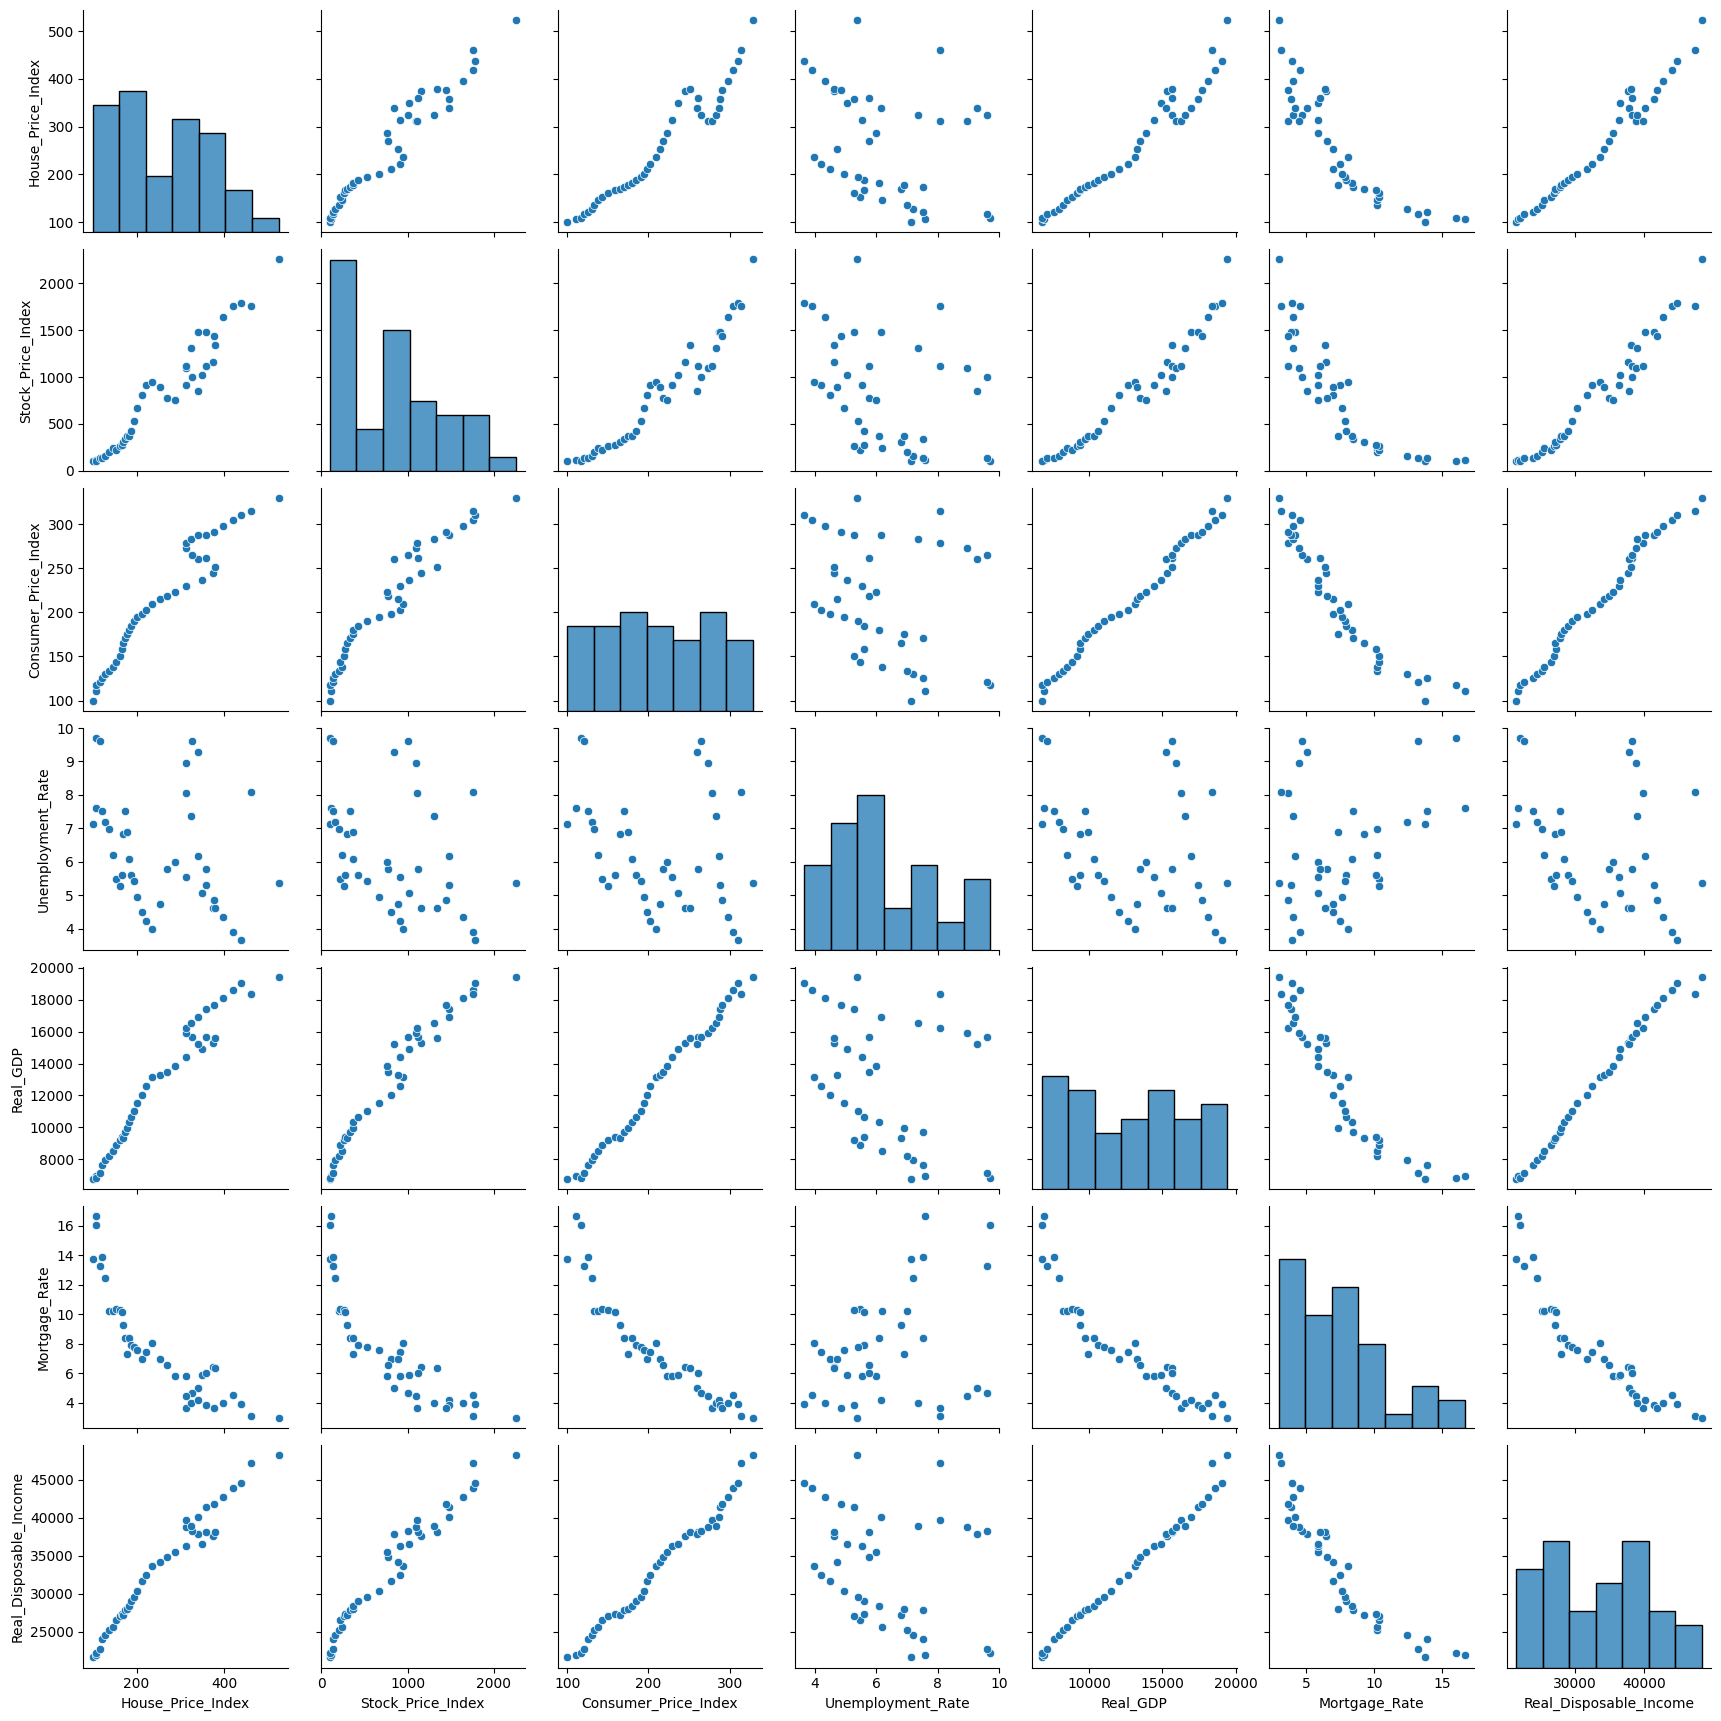

In [ ]:
import seaborn as sns
sns.pairplot(
annual_Macro_df80,
x_vars=['House_Price_Index','Stock_Price_Index','Consumer_Price_Index',
        'Unemployment_Rate','Real_GDP','Mortgage_Rate','Real_Disposable_Income'],
y_vars=[
    'House_Price_Index','Stock_Price_Index','Consumer_Price_Index',
    'Unemployment_Rate','Real_GDP','Mortgage_Rate','Real_Disposable_Income'],
)


*Các chỉ số có MQH hoàn toàn tương quan*

Real_Disposable_Income vs CPI: Có thể quan sát được tại US CPI cao lên thì thu nhập của người dân cũng được tăng trưởng theo đó, đảm bảo được mức lương tăng thêm một phần nào đó bù đắp được mức tăng của giá cả hàng hóa.

Real_Disposable_Income vs Real_GDP: GDP đo lường sức khỏe kinh tế của một quốc gia, vì thể hiển nhiên GDP càng tăng thì đất nước cũng như người dân càng thịnh vượng.

Real_GDP vs CPI: Có thể thấy sự tăng trưởng của GDP tất yếu sẽ kéo theo sự tăng giá hàng hóa sản phầm (hay tăng trưởng lạm phát).

*Các chỉ số có MQH tương đối tương quan*

*Các chỉ số có MQH không tương quan với nhau*

Có thể thấy rằng Tỷ lệ thất nghiệp (Unemployment_Rate) không có mối tương quan với bất kì chỉ số kinh tế vĩ mô nào khi nhìn vào biểu đồ scatter plot.

**ĐÁNH GIÁ TỔNG QUÁT VỀ TÌNH HÌNH KINH TẾ VĨ MÔ TẠI MỸ**

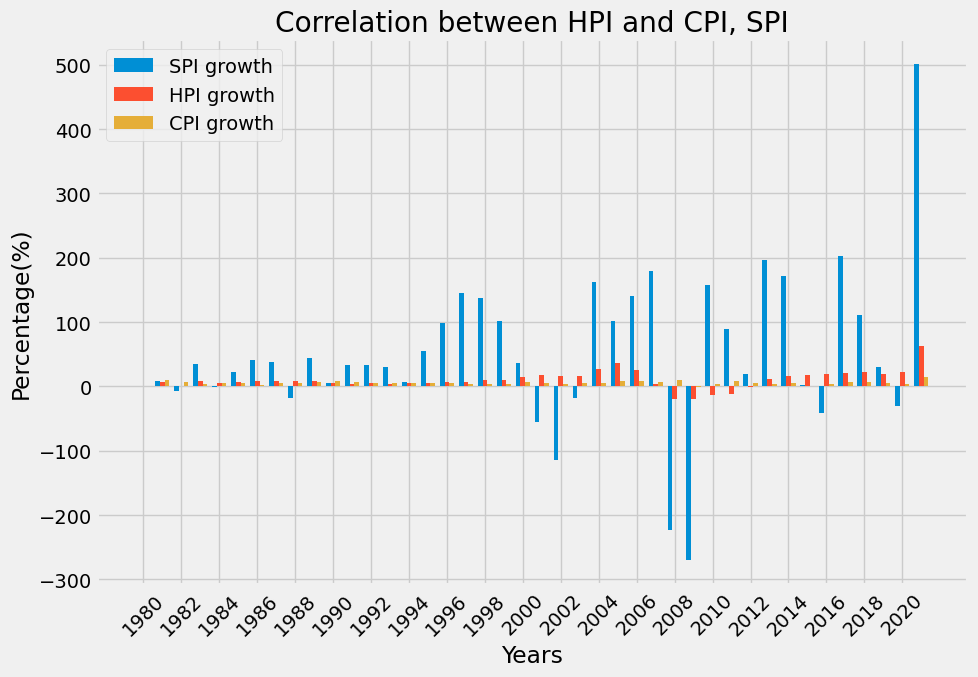

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,7))
Years = annual_Macro_df80['Date'].dt.year
HPI_growth = annual_Macro_df80['HPI_continous_growth']
SPI_growth = annual_Macro_df80['SPI_continous_growth']
CPI_growth = annual_Macro_df80['CPI_continous_growth']
width = 0.25
SPI_x = [x - width for x in Years]
HPI_x = [x for x in Years ]
CPI_x = [x + width for x in Years]
plt.bar(SPI_x, SPI_growth, width=width, label='SPI growth')
plt.bar(HPI_x, HPI_growth, width=width, label='HPI growth')
plt.bar(CPI_x, CPI_growth, width=width, label='CPI growth')
plt.xticks(np.arange(1980, 2022, 2),rotation=45)
plt.xlabel('Years')
plt.ylabel('Percentage(%)')
plt.title('Correlation between HPI and CPI, SPI')
plt.tight_layout()
plt.legend()
plt.show()


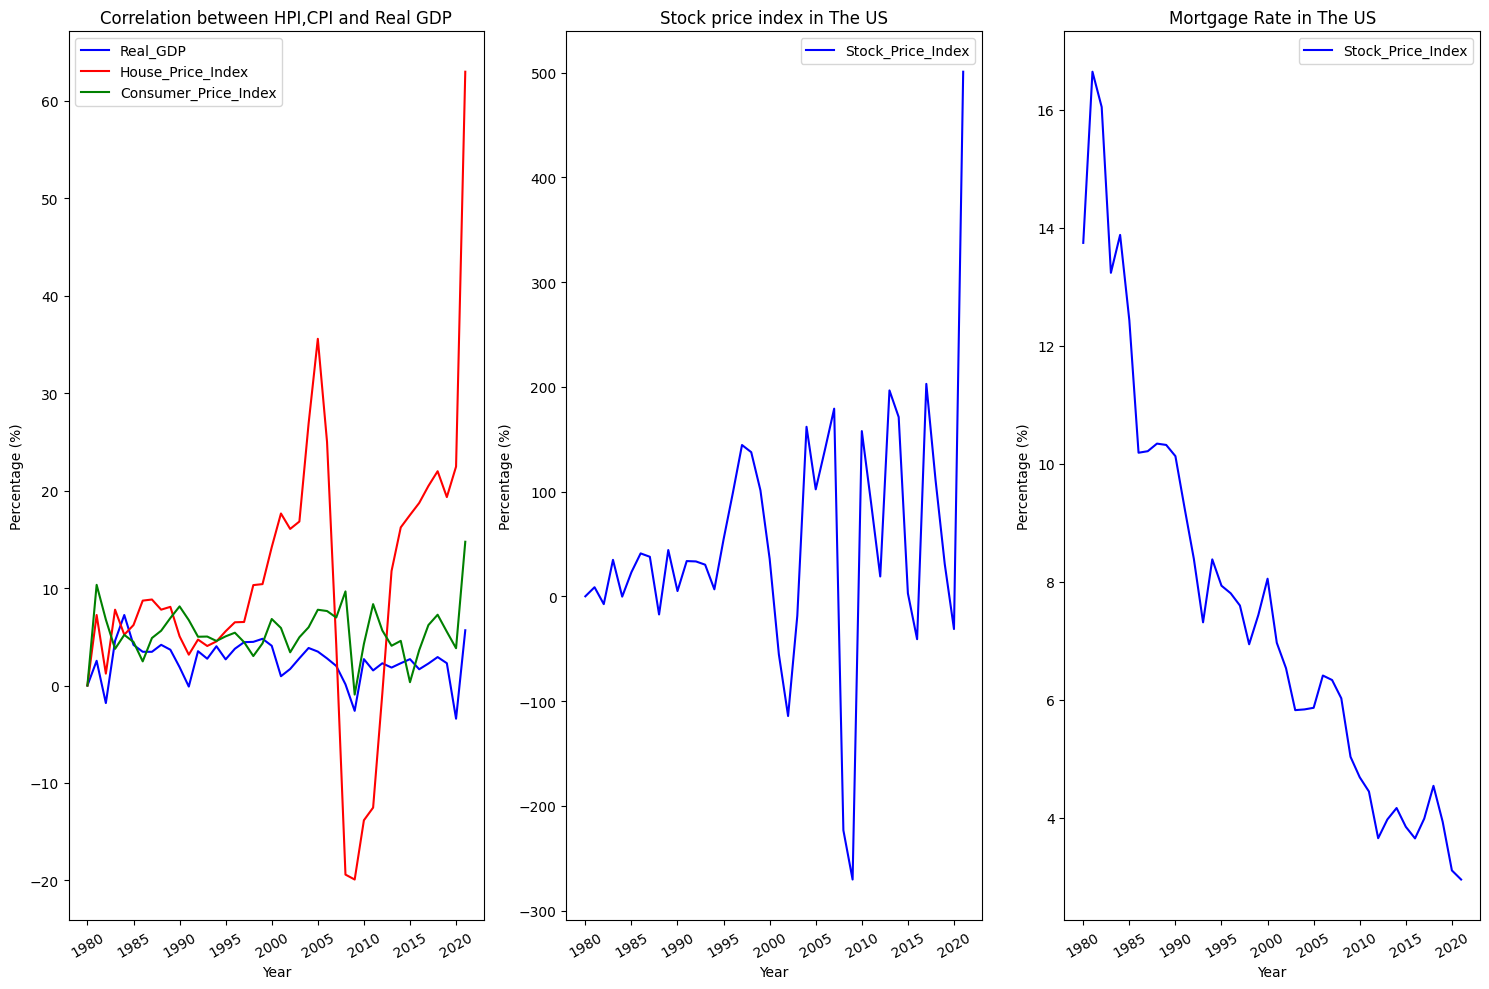

In [ ]:
import numpy as np
plt.style.use('default')
x = annual_Macro_df80['Date'].dt.year
plt.figure(figsize = (15,10))
#Real_GDP, HPI và CPI
plt.subplot(1,3,1)
y1 = annual_Macro_df80['Real_GDP_growth']
y2 = annual_Macro_df80['HPI_continous_growth']
y3 = annual_Macro_df80['CPI_continous_growth']
plt.plot(x, y1, 'b-', label='Real_GDP')
plt.plot(x, y2, 'r-', label='House_Price_Index')
plt.plot(x, y3, 'g-', label='Consumer_Price_Index')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(np.arange(1980, 2022, 5),rotation=30)
plt.yticks(np.arange(-20, 61, 10))
plt.title('Correlation between HPI,CPI and Real GDP')
plt.legend()
#SPI
plt.subplot(1,3,2)
y4 = annual_Macro_df80['SPI_continous_growth']
plt.plot(x, y4, 'b-', label='Stock_Price_Index')
plt.xticks(np.arange(1980,2022,5),rotation = 30)
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Stock price index in The US')
plt.legend()
#Mortgage Rate
plt.subplot(1,3,3)
y5 = annual_Macro_df80['Mortgage_Rate']
plt.plot(x, y5, 'b-', label='Stock_Price_Index')
plt.xticks(np.arange(1980,2022,5),rotation = 30)
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Mortgage Rate in The US')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x700 with 0 Axes>

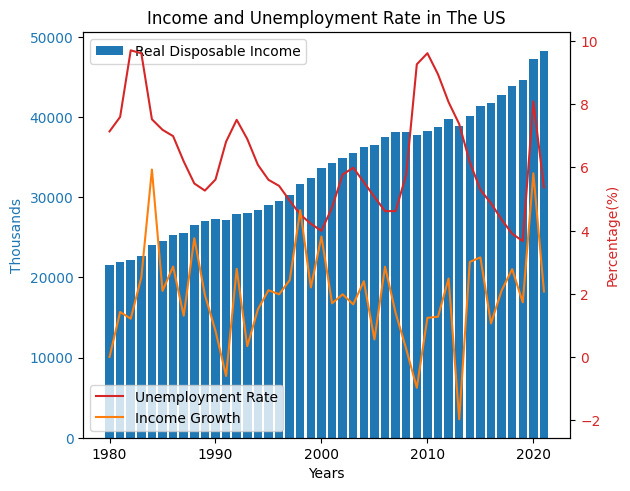

In [ ]:
y6 = annual_Macro_df80['Unemployment_Rate']
y7 = annual_Macro_df80['Real_Disposable_Income']
y8 = annual_Macro_df80['Income_growth']
x = annual_Macro_df80['Date'].dt.year
plt.style.use('default')
plt.figure(figsize = (10,7))
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Thousands', color=color)
ax1.bar(annual_Macro_df80['Date'].dt.year, annual_Macro_df80['Real_Disposable_Income'], color=color, label='Real Disposable Income')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage(%)', color=color)
ax2.plot(x, y6, color=color,label = 'Unemployment Rate')
ax2.plot(x, y8, color = 'tab:Orange',label = 'Income Growth')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
fig.tight_layout()
plt.title('Income and Unemployment Rate in The US')
plt.show()

*Nhận xét tổng quát:*

Tổng quan các chỉ số HPI, SPI, CPI và Real_GDP khá đồng pha với nhau, tuy nhiên tốc độ biến thiên của mỗi chỉ số trong từng giai đoạn là khác nhau:
      
    Với chỉ số SPI tốc độ biến thiên rất lớn trong giai đoạn từ 1980 đến 2021 (lên tới vài trăm phần trăm).
    Chỉ số HPI có tốc độ biến thiên tương đối từ vài chục phần trăm trong cả giai đoạn
    GDP và CPI biến thiên chậm hơn loanh quanh mức dưới 10 phần trăm

Đặc biệt, trong giai đoạn khủng hoảng kinh tế bắt đầu từ năm 2007, các chỉ số trên đều chứng kiến tốc độ tăng trưởng âm, giảm mạnh xuống đáy ở năm 2009 sau đó bắt đầu hồi phục lại với tốc độ ấn tượng vào các năm tiếp theo.

Nhìn vào đồ thị biểu diễn lãi suất cho vay có thế chấp tại Mỹ, có thể thấy một phần nguyên nhân của khủng hoảng kinh tế là do tại năm 2006, Chính phủ phần nào đã nâng lãi suất từ 6% lên khoảng 6.5 - 7% trong khi nội tại nền kinh tế đang có dấu hiệu suy yếu.

Có thể thấy lãi suất cho vay có tài sản đảm bảo ở Mỹ giảm dần từ năm 1980 đến 2021. Trong giai đoạn khủng hoảng kinh tế cũng như để có được tốc độ tăng trưởng trở lại ấn tượng như vậy, các ngân hàng đã giữ mặt bằng lãi suất ở mức thấp khoảng dưới 5%.

Khi nhìn vào đồ thị thể hiện mức thu nhập của người dân Mỹ, trong giai đoạn khủng hoảng thu nhập của người dân có giảm đi tuy nhiên không đáng kể, thu nhập người dân Mỹ vẫn ở mức cao. Tuy nhiên tỷ lệ thất nghiệp hậu khủng hoảng lại tăng mạnh cho thấy sự mong manh trong thu nhập của người dân.



---

*Chú ý:*

Mặc dù SPI và HPI khá đồng pha nhưng tốc độ biến thiên chênh lệch quá lớn nên có thể nói tại Mỹ, chỉ số SPI không ảnh hưởng tới HPI trong giai đoạn đang phân tích.

CPI và HPI đồng pha với nhau qua các giai đoạn tuy nhiên vào thời kì khủng hoảng, CPI vẫn tăng trưởng dương trong khi đó giá tài sản tài chính cụ thể là giá nhà và giá cổ phiếu tại Mỹ lại giảm -> cho thấy nghịch lý trong lý thuyết kinh tế vĩ mô.

Ở đây, mình sẽ tập trung phân tích mối tương quan giữa chỉ số giá nhà và các chỉ số kinh tế vĩ mô khác trong giai đoạn khủng hoảng kinh tế và phục hồi sau đó.






**PHÂN TÍCH CHI TIẾT CHỈ SỐ ẢNH HƯỚNG TỚI GIÁ NHÀ TẠI MỸ**

In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/FinalProject_MD03/Housing_Macroeconomic_Factors_US (2).csv')
housing_df.head()

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN


In [ ]:
#Chuyển dữ liệu cột Date thành datetime
housing_df['Date'] = pd.to_datetime(housing_df['Date'])
#Replace giá trị HPI tại 2000-01-01 bằng 100
housing_df.iloc[156,1] = 100
#Tính tốc độ tăng trưởng (%) của HPI qua các tháng (gốc so sánh là tháng 1 năm 2000)
housing_df['HPI_previous_year'] = housing_df['house_price_index'].shift(1)
housing_df['HPI_continous_growth'] = housing_df['house_price_index'] - housing_df['HPI_previous_year']
#Xóa cột không cần thiết
housing_df = housing_df.drop(['HPI_previous_year'], axis=1)
housing_df.head()


,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai,HPI_continous_growth
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN,0.459
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN,0.311
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN,0.397
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN,0.433


<Axes: xlabel='Year', ylabel='Month'>

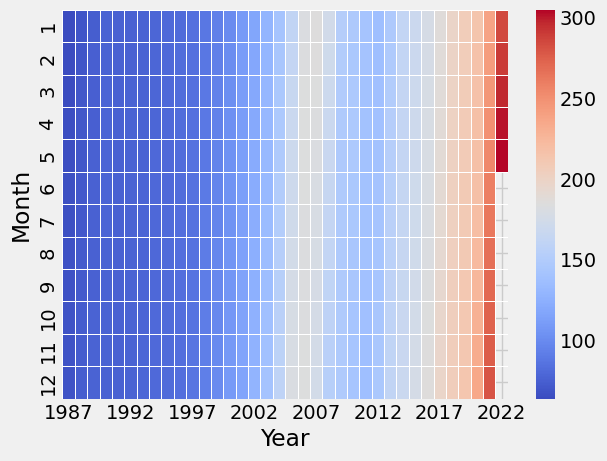

In [ ]:
import datetime
import numpy as np
#Chuyển từ datetime sang str
housing_df['Date'] = housing_df['Date'].astype(str)
date = [datetime.datetime.strptime(dt, '%Y-%m-%d') for dt in housing_df['Date']]
housing_df['Year'] = [dt.year for dt in date]
housing_df['Month'] = [dt.month for dt in date]

housing_df_pivot = housing_df.pivot(index = 'Month',columns='Year', values='house_price_index')
housing_df_pivot.head()

#Vẽ heat map
sns.heatmap(
housing_df_pivot,
fmt='.2f',
linewidths=.5,
xticklabels=5
             ,
cmap="coolwarm")

Có thể thấy giá nhà tại Mỹ tăng dần qua các năm, các tháng càng về giai đoạn sau tăng giá càng mạnh.

Tuy nhiên vào giai đoạn khủng hoảng bắt đầu từ năm 2007, giá nhà bắt đầu giảm cho tới năm 2009,2010 mới có dấu hiệu tăng trở lại qua các tháng.

Từ đó mình sẽ đi sâu vào phân tích giá nhà tại giai đoạn khủng hoảng đó.

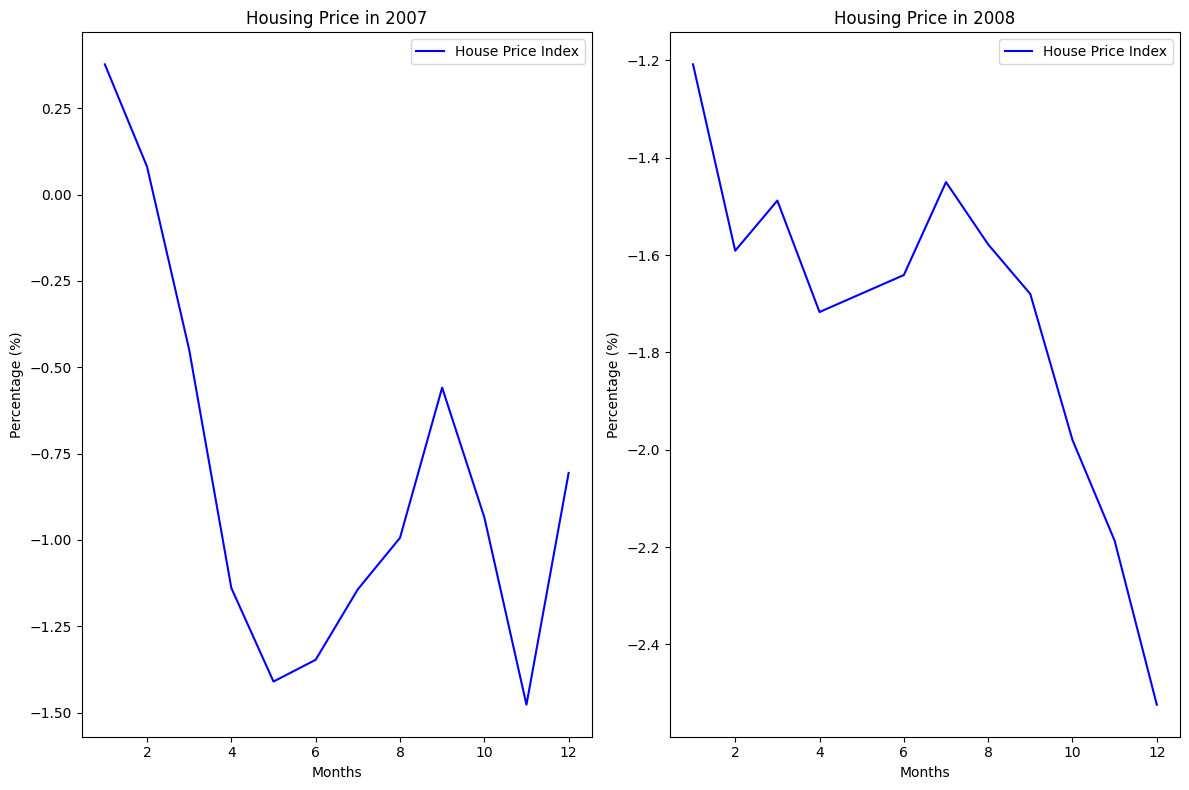

In [ ]:
#Đổi kiểu dữ liệu cột Date từ str sang datetime
housing_df['Date'] = pd.to_datetime(housing_df['Date'])
#Dữ liệu giá nhà năm 2007
housing_df_2007 = housing_df[housing_df['Year'] == 2007]
housing_df_2007.head()
#Dữ liệu giá nhà năm 2008
housing_df_2008 = housing_df[housing_df['Year'] == 2008]
housing_df_2008.head()

months = housing_df_2007['Month'].unique()
plt.style.use('default')
plt.figure(figsize = (12,8))
#2007
plt.subplot(1,2,1)
HPI2007 = housing_df_2007['HPI_continous_growth']
plt.plot(months, HPI2007, 'b-', label='House Price Index')
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.title('Housing Price in 2007')
plt.legend()
#Mortgage Rate
plt.subplot(1,2,2)
HPI2008 = housing_df_2008['HPI_continous_growth']
plt.plot(months, HPI2008, 'b-', label='House Price Index')
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.title('Housing Price in 2008')
plt.legend()
plt.tight_layout()
plt.show()

Có thể thấy xuyên suốt 2 năm giai đoạn khủng hoảng giá nhà tại Mỹ đều sụt giảm, mức tăng trưởng âm chiếm đa phần.

Vẫn có những tháng tốc độ tăng trưởng giá nhà được phục hồi chẳng hạn như giai đoạn tháng 5 tới tháng 9 2007 và tháng 5 tới tháng 7 2008, tuy nhiên giá nhà vẫn giữ mức tăng trưởng âm trong giai đoạn đó.

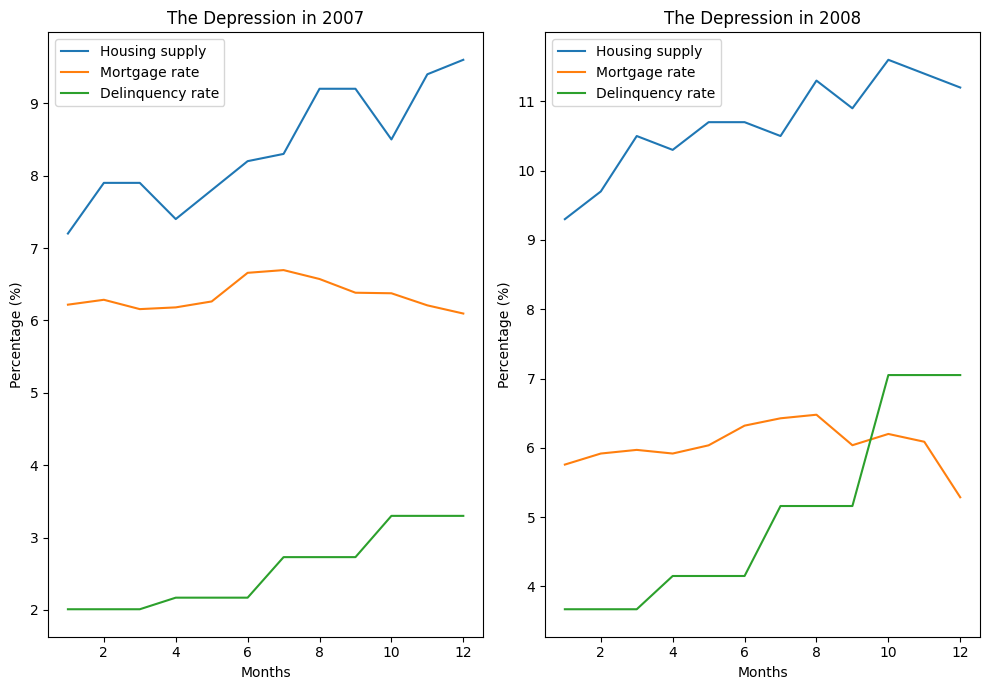

In [ ]:
plt.style.use('default')
plt.figure(figsize = (10,7))
months = housing_df['Month'].unique()
supply2007 = housing_df_2007['house_supply']
supply2008 = housing_df_2008['house_supply']
mortgage_rate_2007 = housing_df_2007['mortgage_rate']
mortgage_rate_2008 = housing_df_2008['mortgage_rate']
delinquency2007 = housing_df_2007['delinquency_rate']
delinquency2008 = housing_df_2008['delinquency_rate']
#2007
plt.subplot(1,2,1)
plt.plot(months, supply2007, label='Housing supply')
plt.plot(months, mortgage_rate_2007, label='Mortgage rate')
plt.plot(months, delinquency2007, label='Delinquency rate')
plt.title('The Depression in 2007')
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.legend()
#2008
plt.subplot(1,2,2)
plt.plot(months, supply2008, label='Housing supply')
plt.plot(months, mortgage_rate_2008, label='Mortgage rate')
plt.plot(months, delinquency2008, label='Delinquency rate')
plt.title('The Depression in 2008')
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1000x700 with 0 Axes>

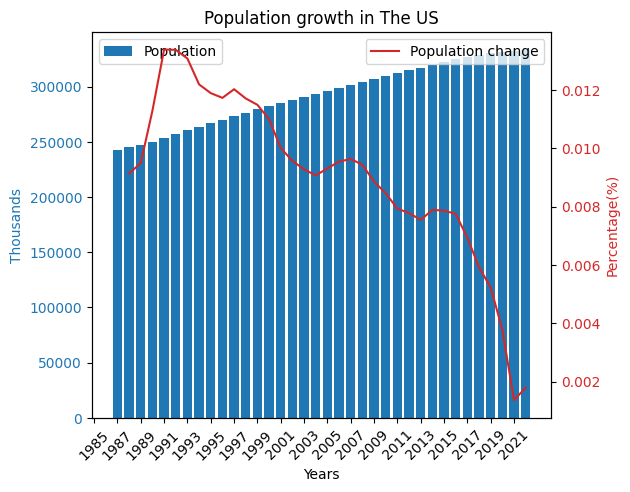

In [ ]:
#Trung bình dân số của Mỹ dựa trên số liệu các tháng
population_growth_df = housing_df.groupby('Year')['population'].mean()
population_growth_df
#Tính tốc độ tăng trưởng của trung bình dân số Mỹ
population_percent_df = population_growth_df.pct_change()

#Dữ liệu
years = population_growth_df.index
population = population_growth_df.values
population_percent = population_percent_df.values
#Vẽ chart
plt.style.use('default')
plt.figure(figsize = (10,7))
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Thousands', color=color)
ax1.bar(years, population, color=color, label='Population')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(np.arange(1985, 2022, 2),rotation=45)
plt.legend()
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage(%)', color=color)
ax2.plot(years, population_percent, color=color,label = 'Population change')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
fig.tight_layout()
plt.title('Population growth in The US')
plt.show()

Ta thấy được mức cung nhà ở ra thị trường tại Mỹ biến động tăng qua các tháng của giai đoạn khủng hoảng. Tăng dần từ mức 7% cho tới đỉnh là 12% vào cuối năm 2008 sau đó có dấu hiệu quay đầu giảm. Điều này cho thấy nguồn cung nhà ở tại Mỹ luôn bị dư thừa so với số căn hộ nhà ở được bán ra và mức dư thừa đó tăng dần qua các tháng.

->Phần nào đó cho thấy giá nhà tại Mỹ sụt giảm ở 2 giai đoạn này là do mối quan hệ cung cầu khi nguồn cung nhà ở ngày càng bị dư thừa.


---


Trong khi đó mặt bằng lãi suất trong giai đoạn khủng hoảng giữ ở mức đi ngang khoảng 6 - 6.5 % nhằm tránh CPI tăng quá cao, tuy nhiên tới cuối năm 2008 có một cú giật mạnh xuống khoảng 5% cho thấy sức khỏe nền kinh tế quá yếu và lãi suất cần được giảm nhằm kích thích tăng trưởng

-> Điều này giúp nền kinh tế khỏe mạnh, người dân dần ổn định cuộc sống từ đó kích cầu mua sắm nhà ở, đẩy giá nhà ở Mỹ tăng trưởng trở lại.


---

Delinquency rate lại cho thấy tỷ lệ các khoản vay bị chậm thanh toán  tại các tổ chức tín dụng đang tăng cao dần đều trong giai đoạn 2 năm khủng hoảng, từ khoảng 2% lên tới khoảng 7% vào cuối năm 2008 và vẫn có dấu hiệu đi lên

-> Lại cho thấy đời sống của người dân vẫn chưa được ổn định khi họ còn phải thanh toán các khoản nợ, giá nhà từ đó chưa thể nhanh chóng phục hồi được.


---


Tuy nhiên, mặt tích cực cho giá nhà tại Mỹ có thể thấy được ở biểu đồ về dân số tại Mỹ. Con số tăng dần đều từ giai đoạn năm 1987, tốc độ tăng trưởng tuy có chậm lại nhưng vẫn luôn giữ ở mức tăng trưởng dương

-> Nhu cầu về nhà ở tại Mỹ phần nào đó luôn được tăng lên nhờ tốc độ tăng trưởng về dân số.

<Figure size 1000x700 with 0 Axes>

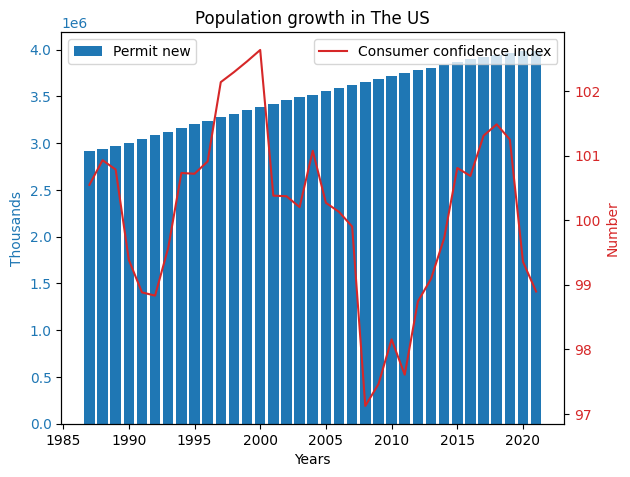

In [ ]:
#Tính tổng permit new ở các năm
permit_new_df = housing_df.groupby('Year')['population'].sum()
#xóa dữ liệu năm 2022
permit_new_df = permit_new_df.drop(2022)
permit_new_df
#Trung bình cci ở các năm với số liệu các tháng sẵn có
cci_growth_df = housing_df.groupby('Year')['cci'].mean()
#xóa dữ liệu năm 2022
cci_growth_df = cci_growth_df.drop(2022)
cci_growth_df
plt.style.use('default')
plt.figure(figsize = (10,7))
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Thousands', color=color)
ax1.bar(permit_new_df.index, permit_new_df.values, color = color,label='Permit new')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Number', color=color)  # we already handled the x-label with ax1
ax2.plot(cci_growth_df.index, cci_growth_df.values, color=color,label = 'Consumer confidence index')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Population growth in The US')
plt.show()

Chính phủ vẫn tăng cường cấp giấy phép cho các đơn vị tư nhân xây dựng thêm nhà ở mới cả ở trong và sau giai đoạn khủng hoảng khi permit new tăng dần đều từ năm 1985 đến hết năm 2021.

Cùng với đó, chỉ số cci giảm mạnh trong giai đoạn khủng hoảng vào năm 2008 tuy nhiên, sau đó sự tích cực của người tiêu dùng tăng cao trở lại sau giai đoạn khủng hoảng.


---

-> Có thể thấy trong và hậu giai đoạn khủng hoảng, chính phủ và người dân, người tiêu dùng một phần nào đó vẫn rất lạc quan về thị trường nhà ở cũng như là lạc quan về nền kinh tế, đây là một dấu hiệu tích cực cho giá nhà ở Mỹ tăng trưởng

**KẾT LUẬN**

Chỉ số giá nhà tại Mỹ (U.S House Pricing Index) đồng pha với Real GDP, CPI, khá tương đồng với Chỉ số giá chứng khoán nhưng ngược pha với lãi suất (Mortgage Rate).

Tại thời điểm khủng hoảng kinh tế năm 2007. 2008 chỉ số giá nhà tại U.S chứng kiến sự giảm mạnh do đây là một phần lý do dẫn đến khủng hoảng. Tuy nhiên sau giai đoạn đó, chính phủ cũng như người mua bán, cung cầu trên thị trường vẫn cho thấy niềm tin tăng trưởng sự tích cực lạc quan thể hiện ở các chỉ số permit_new, ppi_rate, ...

Sau giai đoạn khủng hoảng giá nhà tăng trưởng mạnh trở lại trong những năm tiếp theo.
